<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

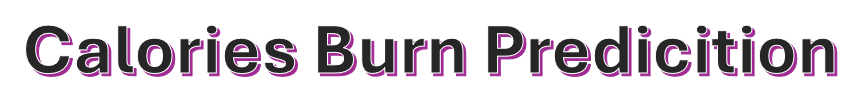

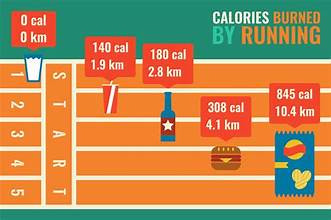

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:WHITE;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step1 | Python Libraries</p></b></h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell\\Downloads'

<a id="data"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step2 | Data</p></b></h1>

In [3]:
df = pd.read_csv('exercise.csv')

In [4]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


In [5]:
# statistical analysis
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
df.shape

(15000, 9)

In [7]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
df["Age"].value_counts()

Age
20    512
21    497
22    489
26    452
25    435
24    426
23    411
27    396
28    390
29    379
32    370
31    339
35    327
30    325
33    320
38    311
34    285
37    283
36    279
39    276
40    260
44    259
42    257
41    252
43    250
46    233
45    233
52    225
47    223
50    220
48    219
54    217
49    208
55    204
53    201
59    198
51    197
56    190
63    182
58    182
61    181
62    180
57    177
64    176
60    172
65    169
73    167
71    163
67    162
70    154
68    150
79    147
66    147
69    145
74    142
76    139
72    137
78    133
77    130
75    117
Name: count, dtype: int64

In [9]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [10]:
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11
14999,11751526,male,63,173,79,18,92,40.5,98


In [11]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | Data Visualization</p></b></h1>

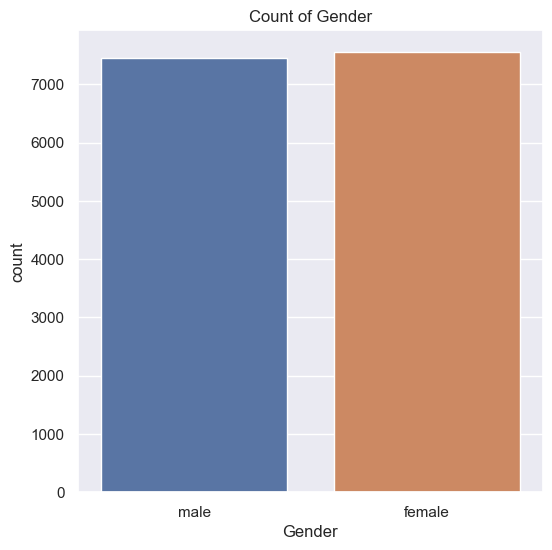

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=df.Gender)
plt.title('Count of Gender')
plt.show()

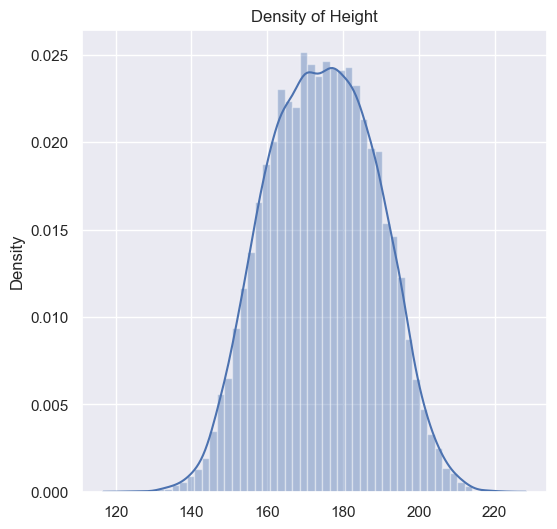

In [13]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.Height)
plt.title('Density of Height')
plt.show()

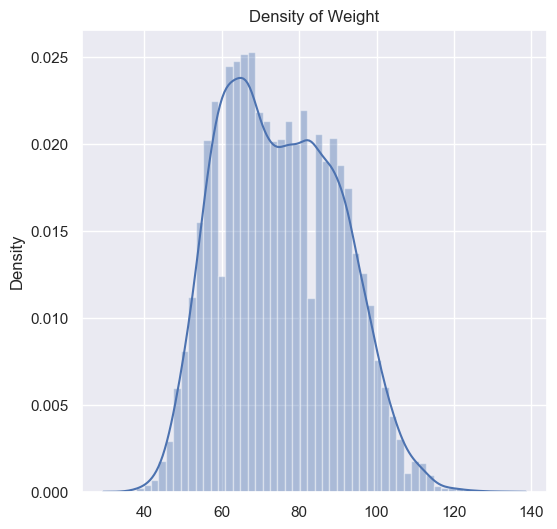

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.Weight)
plt.title('Density of Weight')
plt.show()

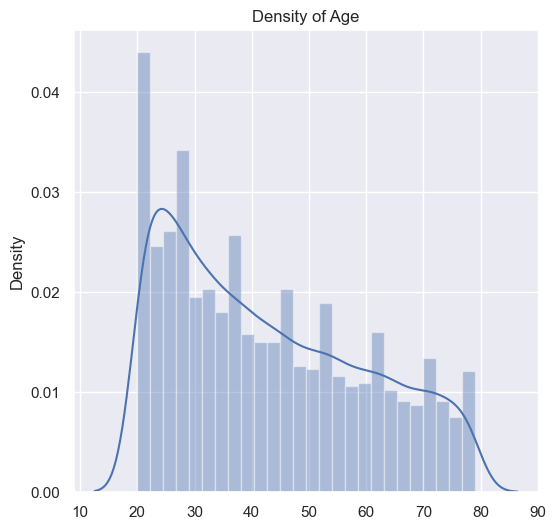

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.Age)
plt.title('Density of Age')
plt.show()

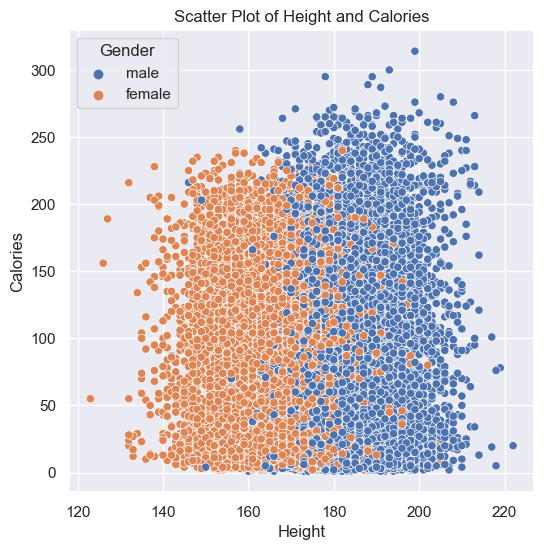

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.Height,y=df.Calories,hue=df.Gender)
plt.title('Scatter Plot of Height and Calories')
plt.show()

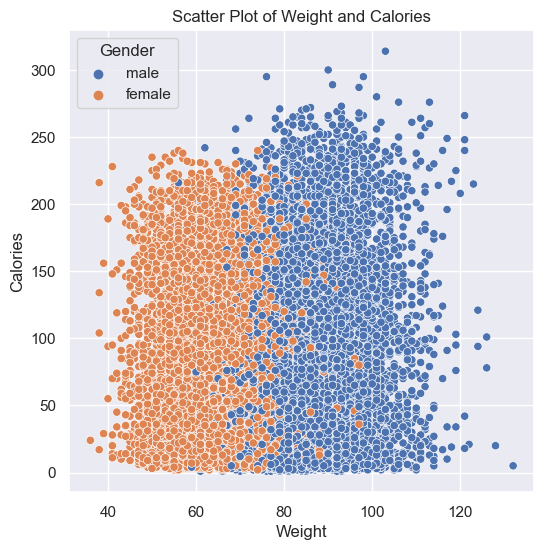

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.Weight,y=df.Calories,hue=df.Gender)
plt.title('Scatter Plot of Weight and Calories')
plt.show()

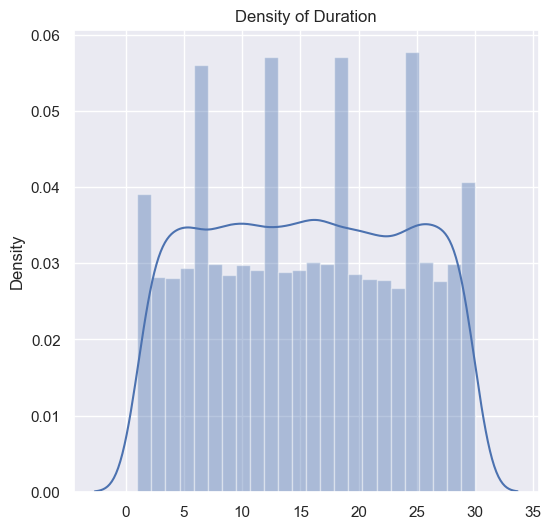

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.Duration)
plt.title('Density of Duration')
plt.show()

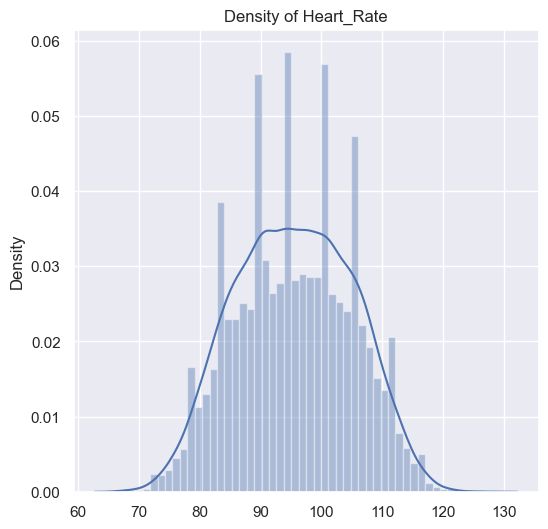

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.Heart_Rate)
plt.title('Density of Heart_Rate')
plt.show()

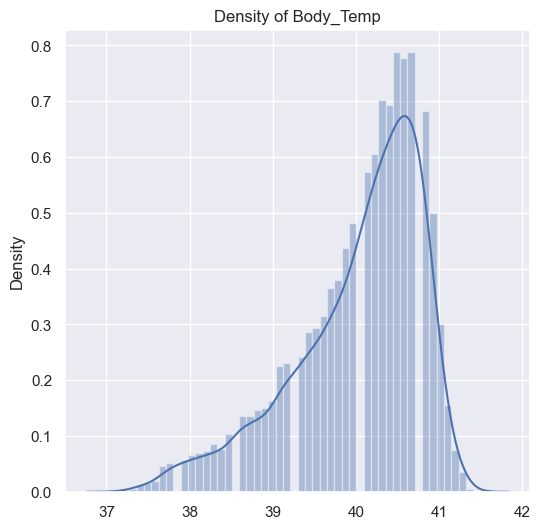

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.Body_Temp)
plt.title('Density of Body_Temp')
plt.show()

# LabelEncoder

In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Display the first few rows
print(df[['Gender']].head())

   Gender
0       1
1       0
2       1
3       0
4       0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int32  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 996.2 KB


In [23]:
df.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [24]:
df.corr()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,-0.000687,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,-0.001827,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<a id="modeling"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:10px; border:solid 4px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Modeling</p></b></h1>

In [25]:
# Splitting the dataset in features and label
X = df.drop('Calories', axis=1)
y = df['Calories']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape,X_test.shape

((12000, 8), (3000, 8))

<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.7 | </span><span style="color:#9b006e">XGBRegressor</span></b></h2> 

In [28]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred1 = xgb.predict(X_test)
r2 = r2_score(y_test, y_pred1) 
print("R-squared(Testing):", r2)
rounded_r2_7 = round(r2*100, 2)
print("R-squared (rounded):", rounded_r2_7, "%")

y_pred2 = xgb.predict(X_train)
r2 = r2_score(y_train, y_pred2) 
print("R-squared(Training):", r2)
rounded_r2 = round(r2*100, 2)
print("R-squared (rounded):", rounded_r2, "%")

R-squared(Testing): 0.9987901041693489
R-squared (rounded): 99.88 %
R-squared(Training): 0.999558534123915
R-squared (rounded): 99.96 %


In [29]:
print(X_test)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
11499  12549363       0   45     154      52        26         107       40.6
6475   13995058       1   21     187      90        29         111       40.5
13167  17223277       1   58     176      77        11          90       40.0
862    18175714       1   35     182      89        24         108       40.8
5970   17841615       0   67     171      67        29         116       41.1
...         ...     ...  ...     ...     ...       ...         ...        ...
6216   19781282       0   61     166      66        28         106       41.0
3585   16324636       0   73     165      66        10          92       40.0
10023  11278005       0   38     169      66        20         104       40.2
14044  19521579       0   25     163      54         5          86       39.2
12965  18264642       1   26     181      84        29         116       41.2

[3000 rows x 8 columns]


In [30]:
print(y_pred1)

[171.81772  194.89551   51.552124 ... 120.90365   19.415033 213.1058  ]


In [31]:
df["Calories"][6475] # This is used for SLicing.

189

In [32]:
df.loc[6475:6475:]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
6475,13995058,1,21,187,90,29,111,40.5,189


# Making Predictive System

In [36]:
input_data = [13995058,1,	21,	187,	90,	29,	111,	40.5]

array_input = np.array(input_data)

reshaped_input = array_input.reshape(1,-1)

prediction = xgb.predict(reshaped_input)

print(prediction)

[194.89551]


#pip install pickle

# Saving the Linear Model in Binary Format

In [37]:
import pickle

pickle.dump(xgb, open('Calories_model.sav','wb'))

# Loading the converted model

In [38]:
loaded_model = pickle.load(open('Calories_model.sav','rb'))

input_data = [13995058,1,21,187,90,29,111,40.5]

array_input = np.array(input_data)

reshaped_input = array_input.reshape(1,-1)

prediction = xgb.predict(reshaped_input)

print(prediction)


[194.89551]
